<a href="https://colab.research.google.com/github/TheAmirHK/Quantum_Computation/blob/main/Greenberger_Horne_Zeilinger_state.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The GHZ state, named after Daniel Greenberger, Michael Horne, and Anton Zeilinger, is a special type of entangled quantum state that involves multiple qubits. The GHZ state for three qubits, denoted as $ |\text{GHZ}^\pm\rangle $, is given by:

$ |\text{GHZ}^\pm\rangle = \frac{1}{\sqrt{2}} (|000\rangle \pm |111\rangle) $

This state represents a superposition where all three qubits are in the state $ |0\rangle $ or $ |1\rangle $ simultaneously. In other words, if one qubit is measured and found to be in the state $ |0\rangle $, then the other two qubits will also be found in the state $ |0\rangle $, and similarly for the state $ |1\rangle $. This simultaneous correlation between the qubits is a hallmark of entanglement.

In [1]:
#!pip install qiskit qiskit_ibm_runtime pylatexenc qiskit_aer

In [2]:
from qiskit import *
from qiskit.tools.visualization import plot_bloch_multivector, array_to_latex, plot_histogram
from qiskit_aer import AerSimulator
from math import pi
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
def plot_bloch(circuit_name):
  simulator = Aer.get_backend('statevector_simulator')
  result = execute(circuit_name, backend=simulator).result()
  statevector = result.get_statevector()
  return plot_bloch_multivector(result.get_statevector())

def state_vector(circuit_name):
  simulator = Aer.get_backend('statevector_simulator')
  result = execute(circuit_name, backend=simulator).result()
  statevector = result.get_statevector()
  return array_to_latex(statevector, prefix="\\text{statevector = }\n")

$GHZ^+$ circuit :  $ |\text{GHZ}^+\rangle = \frac{1}{\sqrt{2}} (|000\rangle + |111\rangle) $


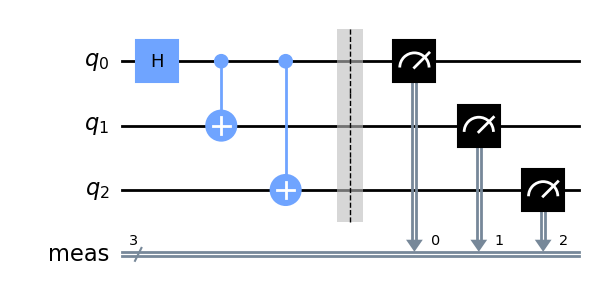

In [4]:
ghz_circuit = QuantumCircuit(3)
ghz_circuit.h(0)
ghz_circuit.cx(0, 1)
ghz_circuit.cx(0, 2)

ghz_circuit.measure_all()
ghz_circuit.draw(output='mpl')

In [5]:
state_vector(ghz_circuit)

<IPython.core.display.Latex object>

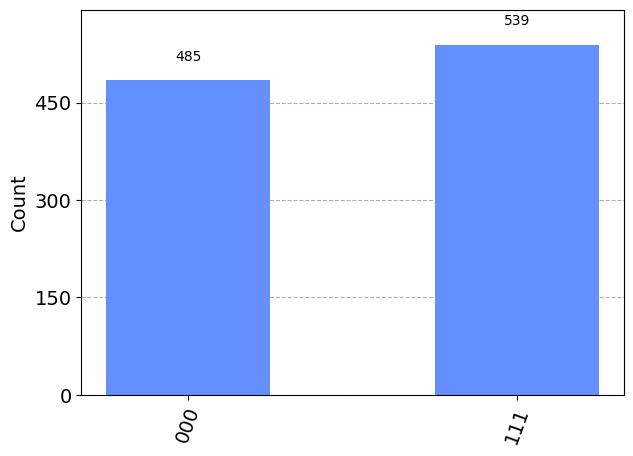

In [6]:
aersim = AerSimulator()
# Perform an ideal simulation
result_ideal = aersim.run(ghz_circuit).result()
counts_ideal = result_ideal.get_counts(0)
plot_histogram(counts_ideal)



---


$GHZ^-$ circuit :  $ |\text{GHZ}^-\rangle = \frac{1}{\sqrt{2}} (|000\rangle - |111\rangle) $


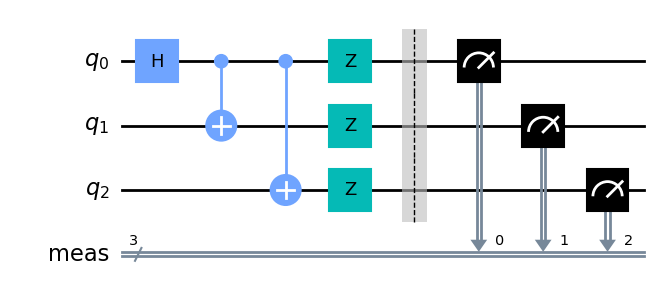

In [7]:
ghz_circuit = QuantumCircuit(3)

ghz_circuit.h(0)
ghz_circuit.cx(0, 1)
ghz_circuit.cx(0, 2)
ghz_circuit.z(0)
ghz_circuit.z(1)
ghz_circuit.z(2)

ghz_circuit.measure_all()
ghz_circuit.draw(output='mpl')

In [8]:
state_vector(ghz_circuit)

<IPython.core.display.Latex object>

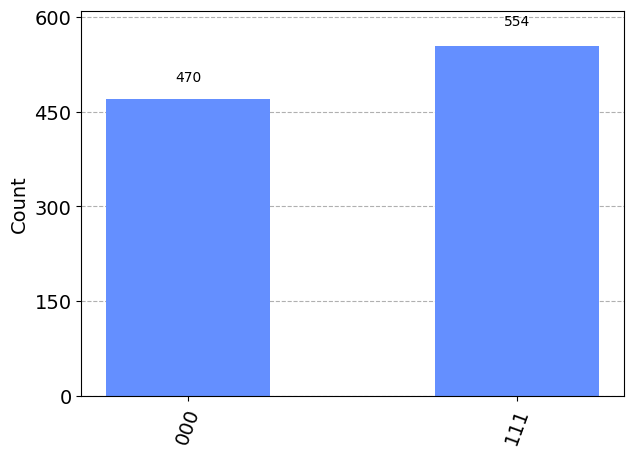

In [9]:
aersim = AerSimulator()
# Perform an ideal simulation
result_ideal = aersim.run(ghz_circuit).result()
counts_ideal = result_ideal.get_counts(0)
plot_histogram(counts_ideal)